<a href="https://colab.research.google.com/github/NehilDanis/GANsAndVAEs/blob/master/BayesClassifier_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Model

When a naive bayes classifier is trained using the MNIST dataset, the distribution representing each digit is found and a sample can be drawn from any class. Below image shows a sample drawn from hand written 3s class. 

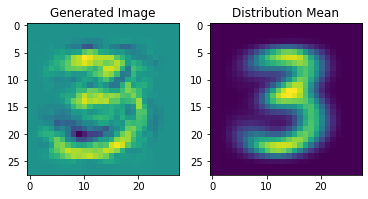

The generated sample and the mean value image of the class 3 resembles each other, however the sample is still a bit blurry. The reason is that not every person writes the number 3 in the same way, hence each class may be represented by more than one Gaussians.

The image below shows how different way of writing 2, can belong to different Gaussians of the same class.

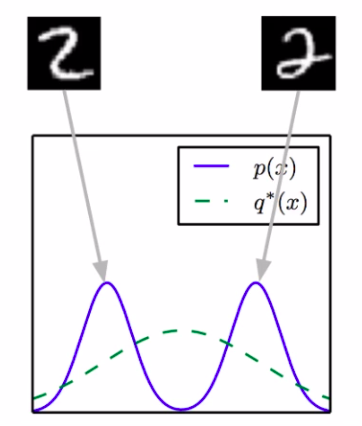

This will introduce a new random variable to the naive Bayes equation. Before the likelihood of data, depend only on the class. However now, since data in each class may be represented by multiple gaussians, data will also depend on which of these gaussians it came from. This new variable is called a latent variable.
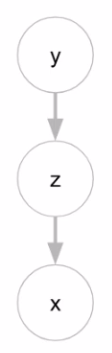

## Latent Variables

It is a common problem to try to estimate the joint probability distribution of a dataset. Usually maximum likelihood(MLE) approach is used to estimate the parameters required to calculate the dataset's joint probability distribution. However this does not always work, because MLE approach expects the dataset to be fully observed. Though for some datasets it may be the case that only some relevant variables are observed and others stayed hidden. These hidden variables are called latent variables. 

The MLE does not work in case that data includes latent variables. Another approach should be used. One such algorithm is Expectation Maximization(EM).

## Expectation Maximization

* iterative approach
* helps to achieve MLE in the presence of latent variables
* two modes in each iteration: E-step, M-Step

**E-Step**. Estimate the missing variables in the dataset.

**M-Step**. Maximize the parameters of the model in the presence of the data.

In [2]:
# do imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

In [6]:
# get the data
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
data = df.values
X = data[:, 1:]
y = data[:, 0]

In [17]:
# classifier

class BayesianGMMClassifier:

  def fit(self, X, y):
    self.K = len(set(y))

    self.gaussians = []
    # for each class we need to estimate the gaussians
    for k in range(self.K):
      print("Fitting gmm ", k)
      Xk = X[y == k] # all data belonging to class k
      gmm = BayesianGaussianMixture(n_components=10)
      gmm.fit(Xk)
      self.gaussians.append(gmm)

  def sample_given_y(self, y):
    gmm = self.gaussians[y]
    sample = gmm.sample()
    # sample returns two things
    # 1- sample
    # 2- which cluster the sample came from
    mean = gmm.means_[sample[1]]
    return sample[0], mean


In [18]:
clf = BayesianGMMClassifier()
clf.fit(X, y)

sample, mean = clf.sample_given_y(3)

Fitting gmm  0
Fitting gmm  1
Fitting gmm  2
Fitting gmm  3
Fitting gmm  4
Fitting gmm  5
Fitting gmm  6
Fitting gmm  7
Fitting gmm  8
Fitting gmm  9


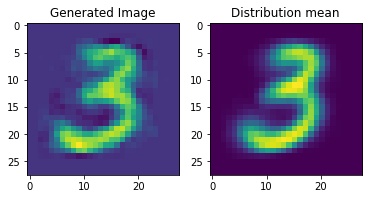

In [19]:
# visualize
fig = plt.figure()
r = 1
c = 2

fig.add_subplot(r, c, 1) # position 1
sample = sample.reshape(28, 28)
plt.imshow(sample)
plt.title('Generated Image')

fig.add_subplot(r, c, 2) # position 2
mean = mean.reshape(28, 28)
plt.imshow(mean)
plt.title('Distribution mean');

In comparison with the sample drawn from a naive bayes classfier, the one with GMM gave much smoother result.

## References
* [A Gentle Introduction to Expectation-Maximization (EM Algorithm)](https://machinelearningmastery.com/expectation-maximization-em-algorithm/)
* [Deep Learning: GANs and Variational Autoencoders](https://www.udemy.com/share/101Xwm3@en5MAMIqLOPOrB7yzbzHcN1B5L_6ZKmCjQFQqfqNmx2wIOURwCSLdjJ4TvkbMnahDQ==/)